# Visualizing Expenses and Revenue for every year as per programs

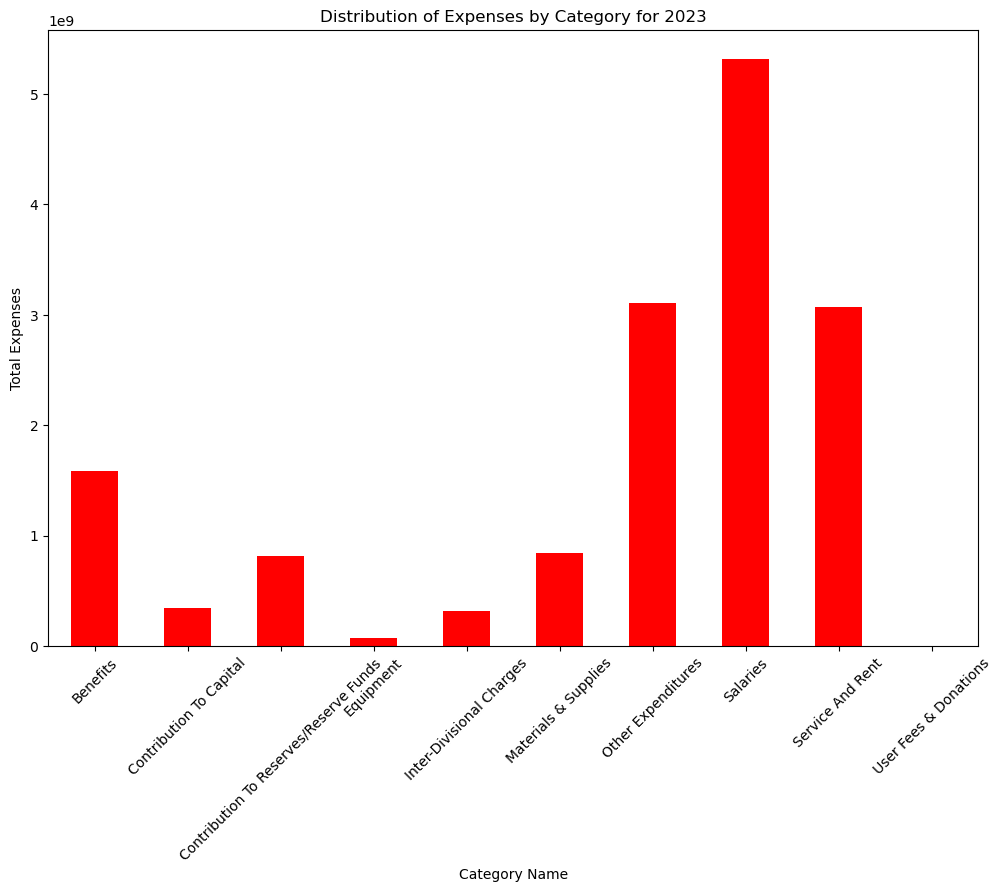

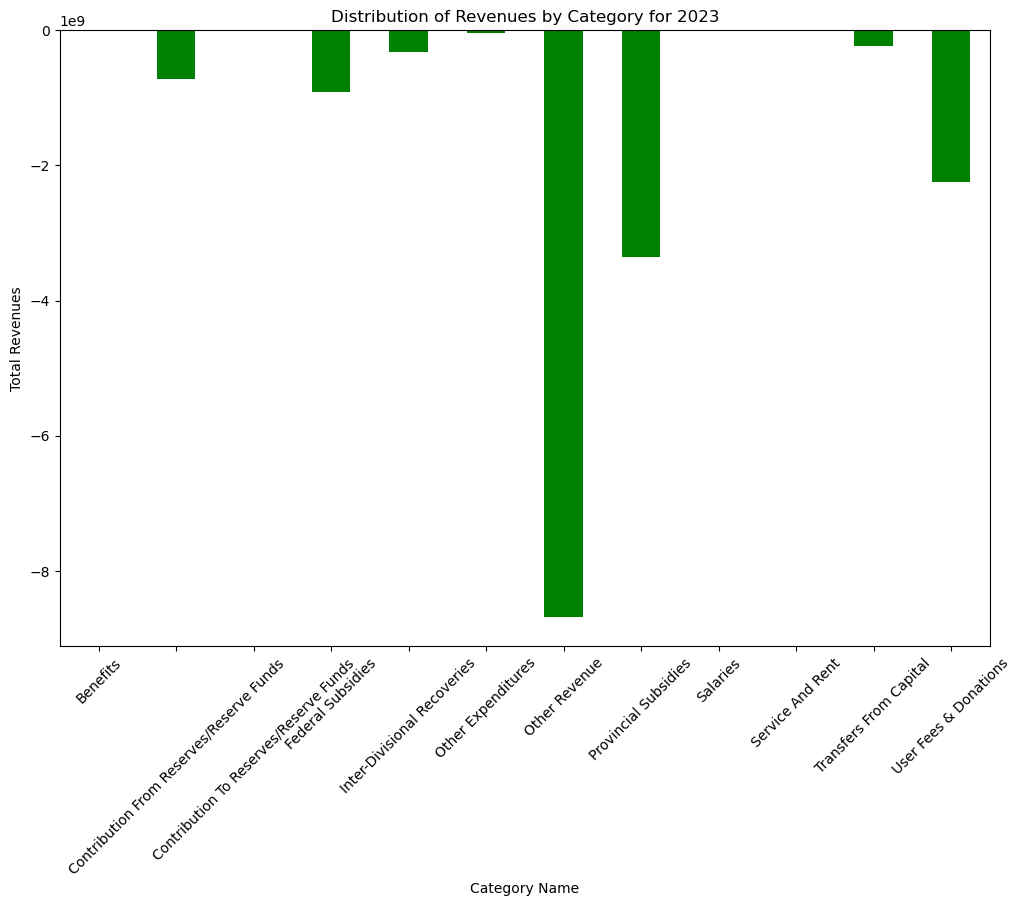

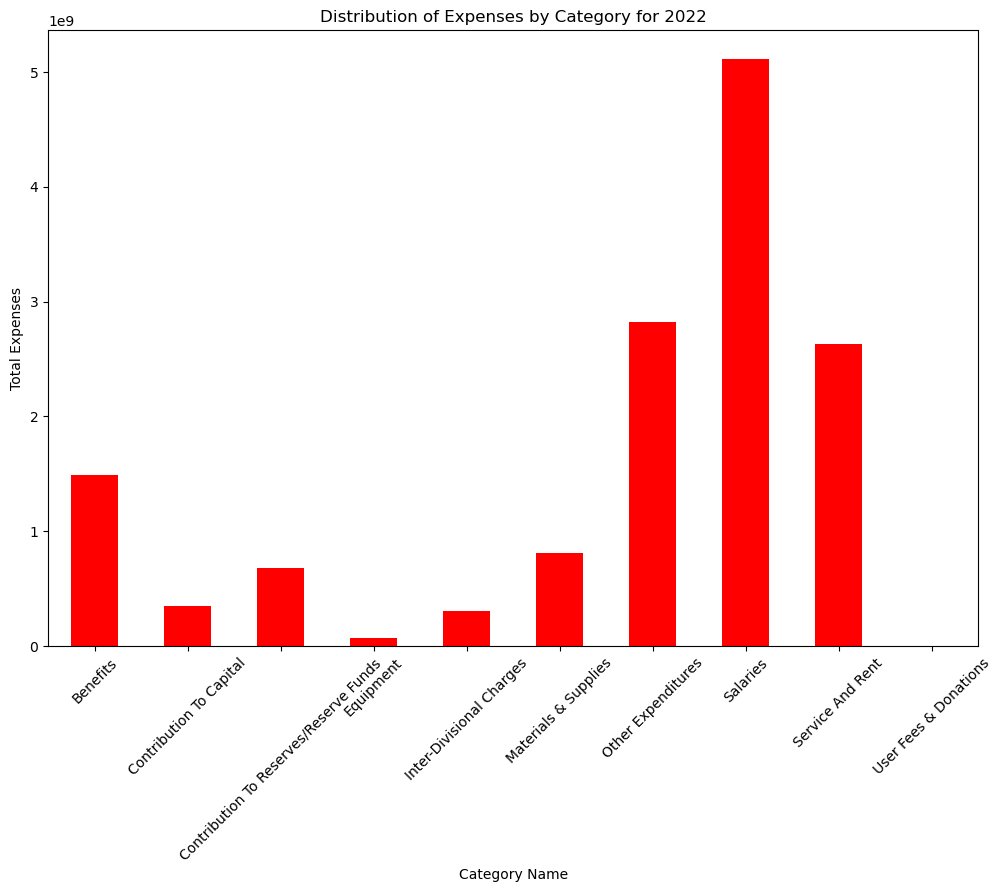

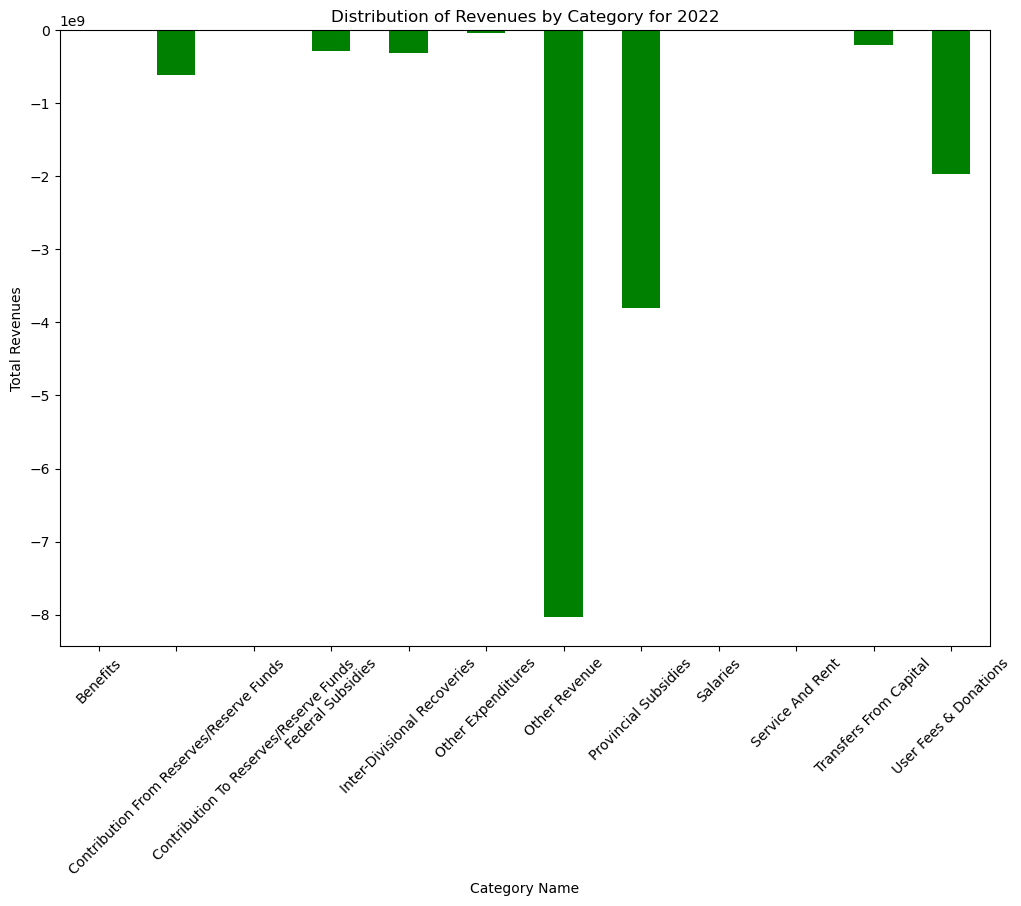

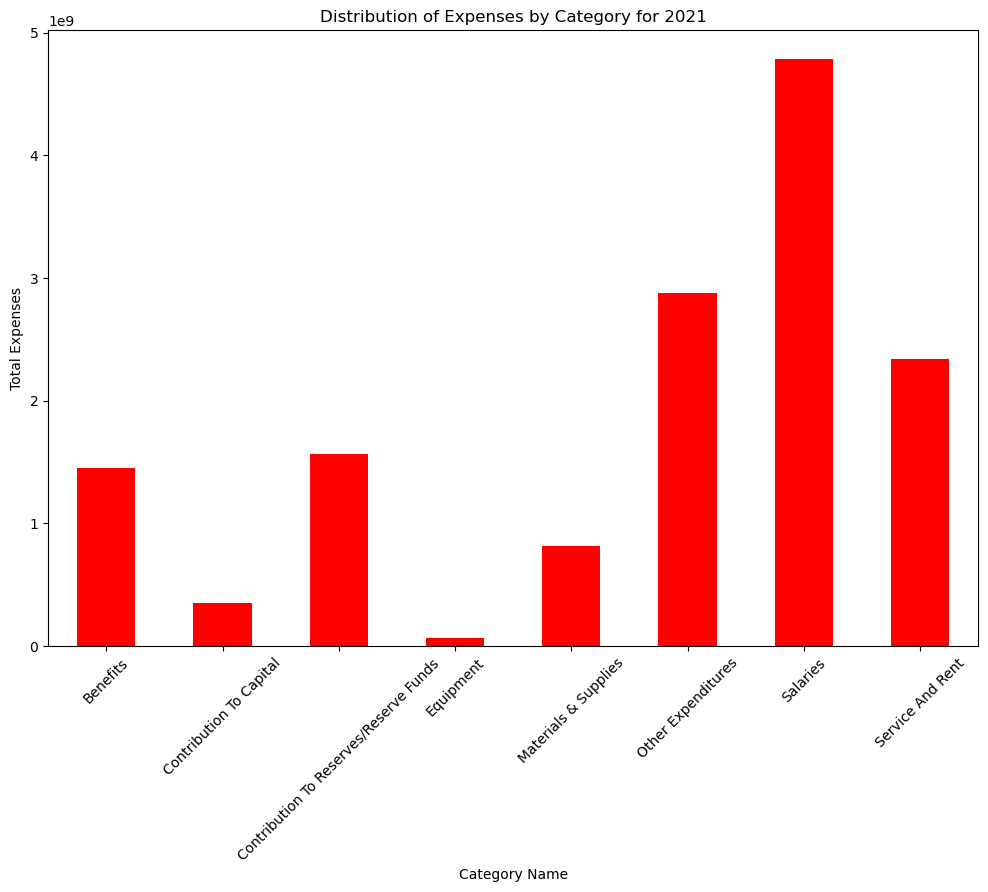

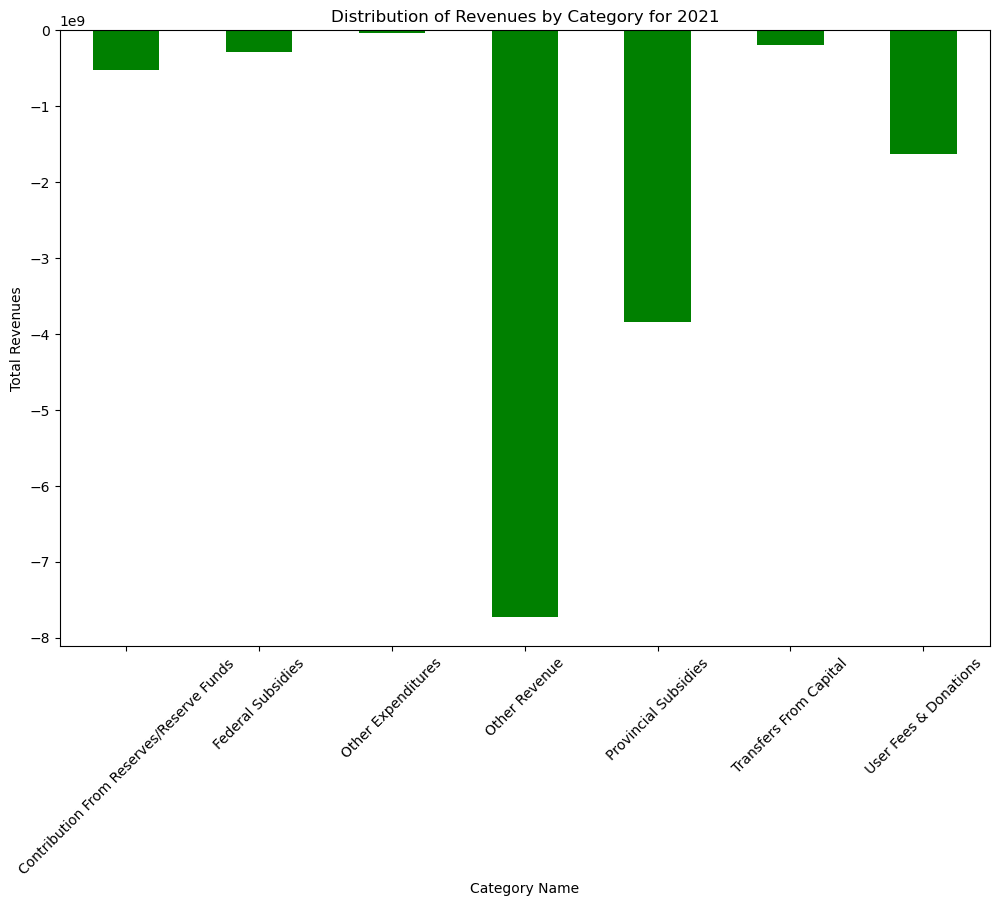

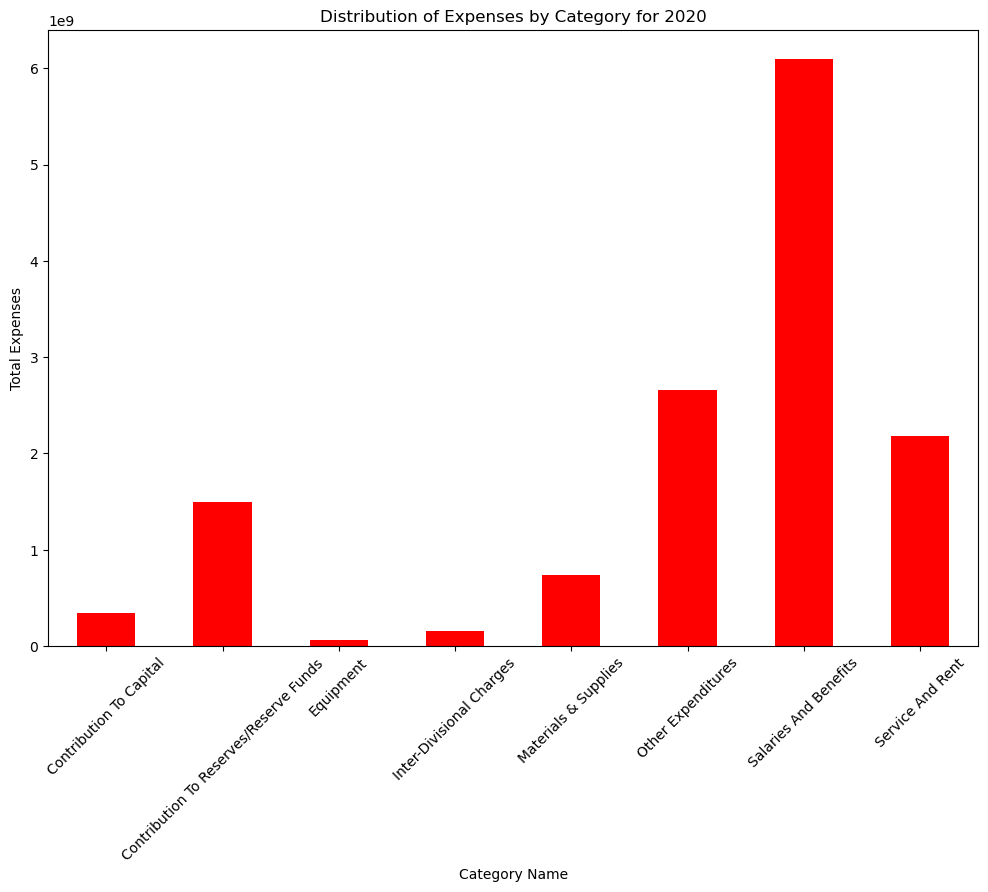

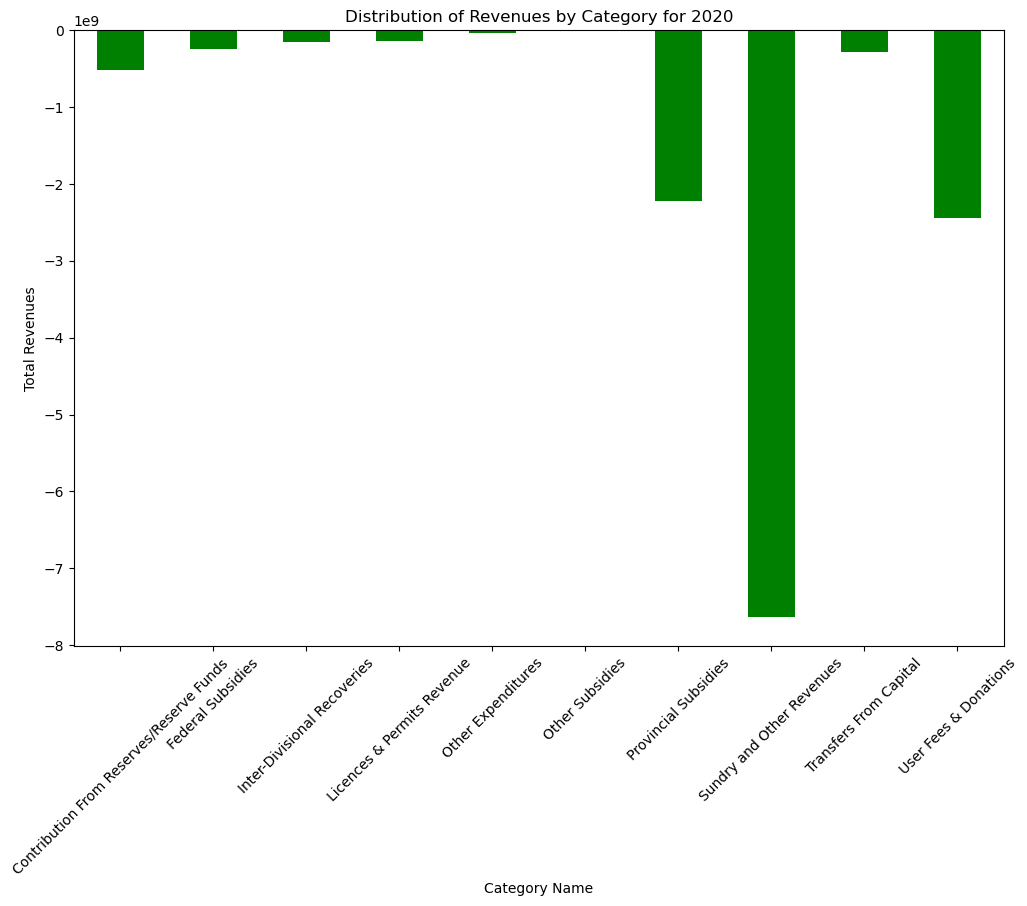

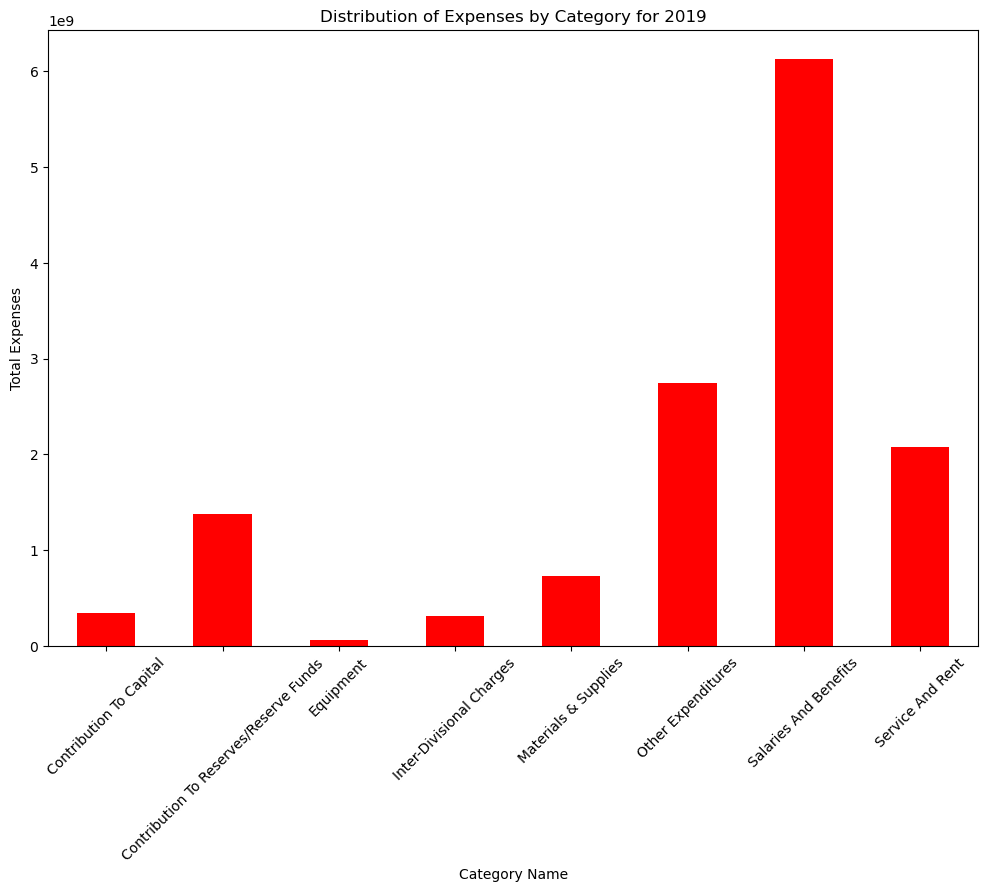

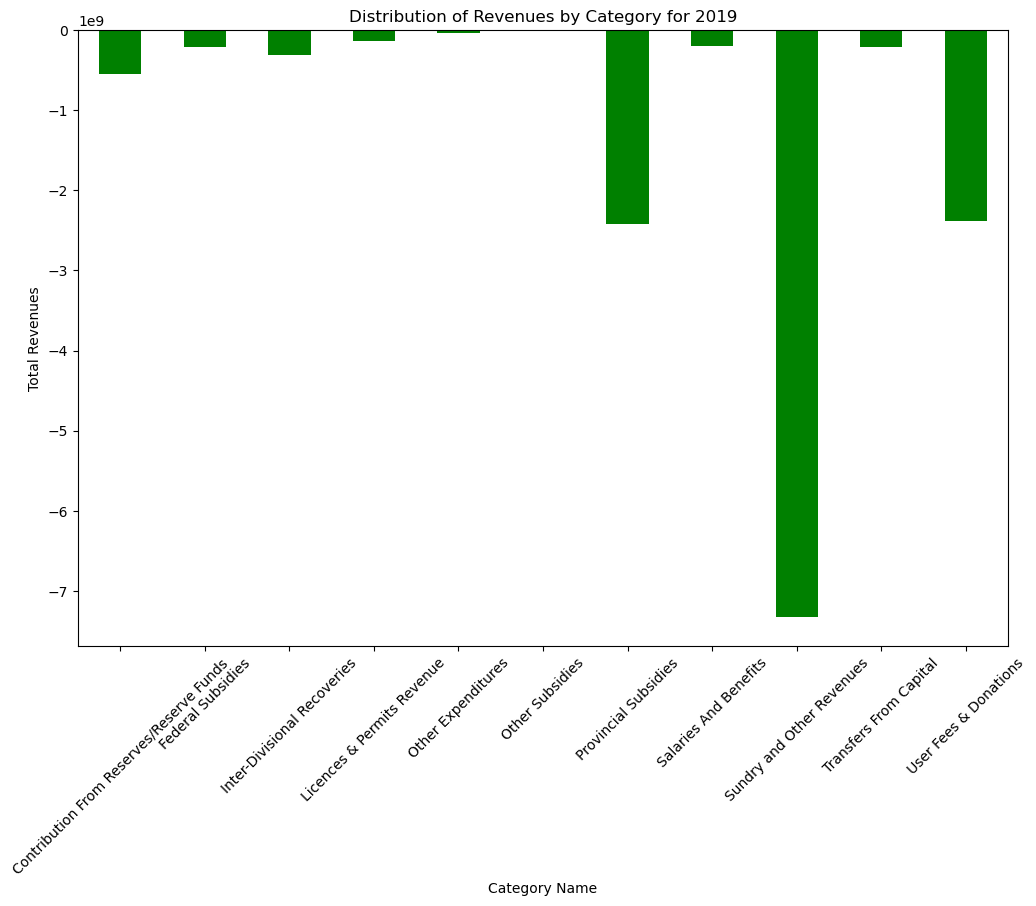

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


def analyze_and_plot(file_path, year):
    df = pd.read_excel(file_path, sheet_name='Open Data')
    df_cleaned = df.drop_duplicates()

    # Convert all column names to strings
    df_cleaned.columns = df_cleaned.columns.map(str)

    # Find the correct column name for the financial data
    financial_column = str(year)  # Default assumption
    if financial_column not in df_cleaned.columns:
        # If the default assumption is wrong, check for an alternative column name
        for col in df_cleaned.columns:
            if str(year) in col:
                financial_column = col
                break

    expenses_data = df_cleaned[df_cleaned[financial_column] > 0]
    revenues_data = df_cleaned[df_cleaned[financial_column] < 0]

    expenses_by_category = expenses_data.groupby('Category Name')[financial_column].sum()
    revenues_by_category = revenues_data.groupby('Category Name')[financial_column].sum()

    # Plotting Expenses
    plt.figure(figsize=(12, 8))
    expenses_by_category.plot(kind='bar', color='red')
    plt.title(f'Distribution of Expenses by Category for {year}')
    plt.xlabel('Category Name')
    plt.ylabel('Total Expenses')
    plt.xticks(rotation=45)
    plt.show()

    # Plotting Revenues
    plt.figure(figsize=(12, 8))
    revenues_by_category.plot(kind='bar', color='green')
    plt.title(f'Distribution of Revenues by Category for {year}')
    plt.xlabel('Category Name')
    plt.ylabel('Total Revenues')
    plt.xticks(rotation=45)
    plt.show()

file_paths = {
    2023: 'Resources/approved-operating-budget-summary-2023.xlsx',
    2022: 'Resources/approved-operating-budget-summary-2022.xlsx',
    2021: 'Resources/approved-operating-budget-summary-2021.xlsx',
    2020: 'Resources/approved-operating-budget-summary-2020.xlsx',
    2019: 'Resources/approved-operating-budget-summary-2019.xlsx',
  
}

format_sci_notation = lambda x: '{:.6e}'.format(x)
for df in df_list:
    df['Budgeted amount'] = df['Budgeted amount'].apply(format_sci_notation)

# Analyzing and plotting for each year
for year, file_path in file_paths.items():
    analyze_and_plot(file_path, year)


# Visualizing expenses and revenues, seperated by programs for all 5 years as a stacked bar chart

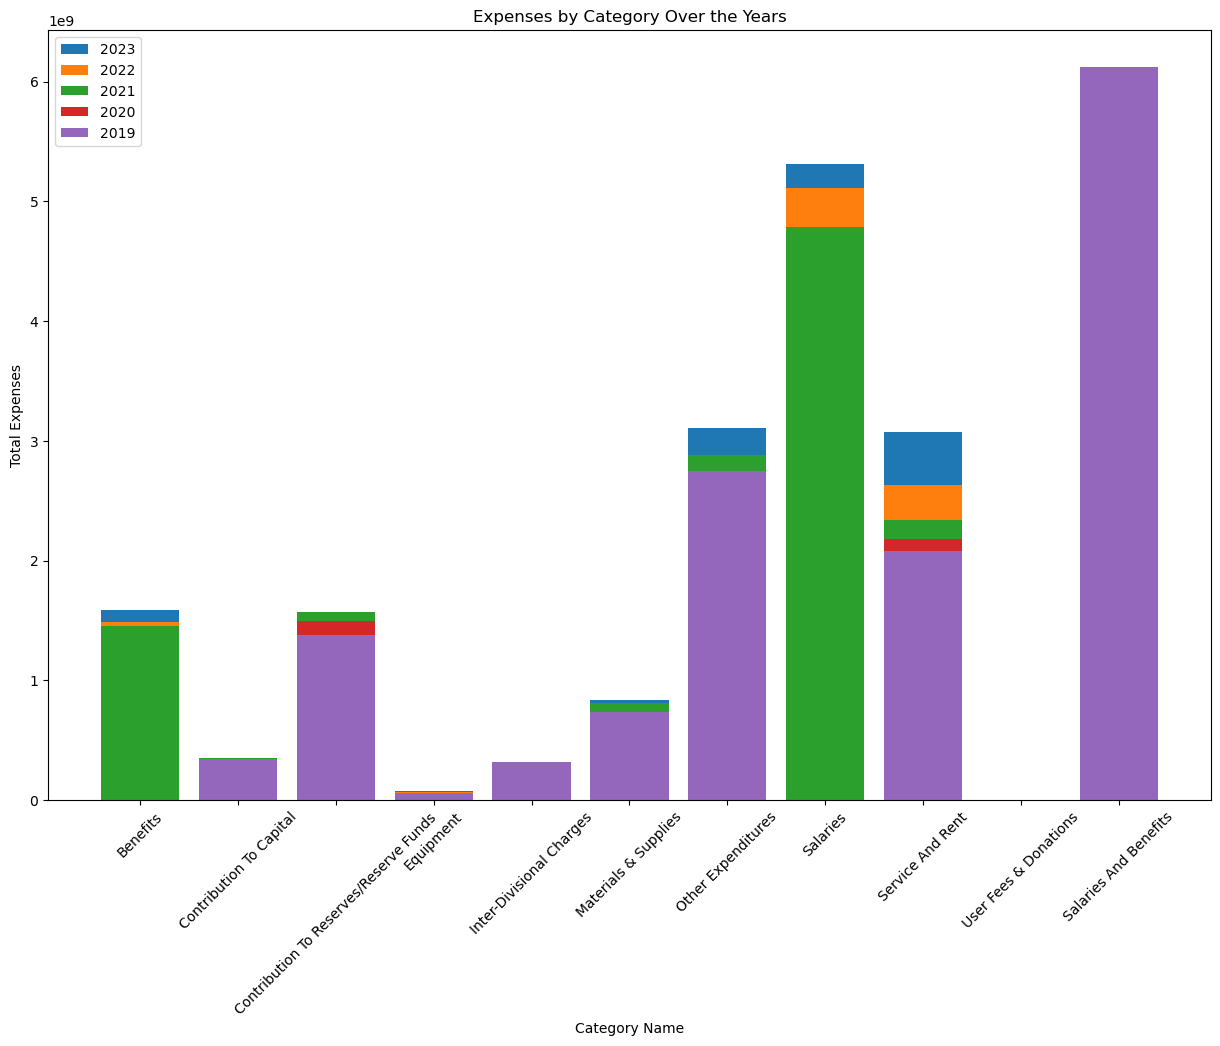

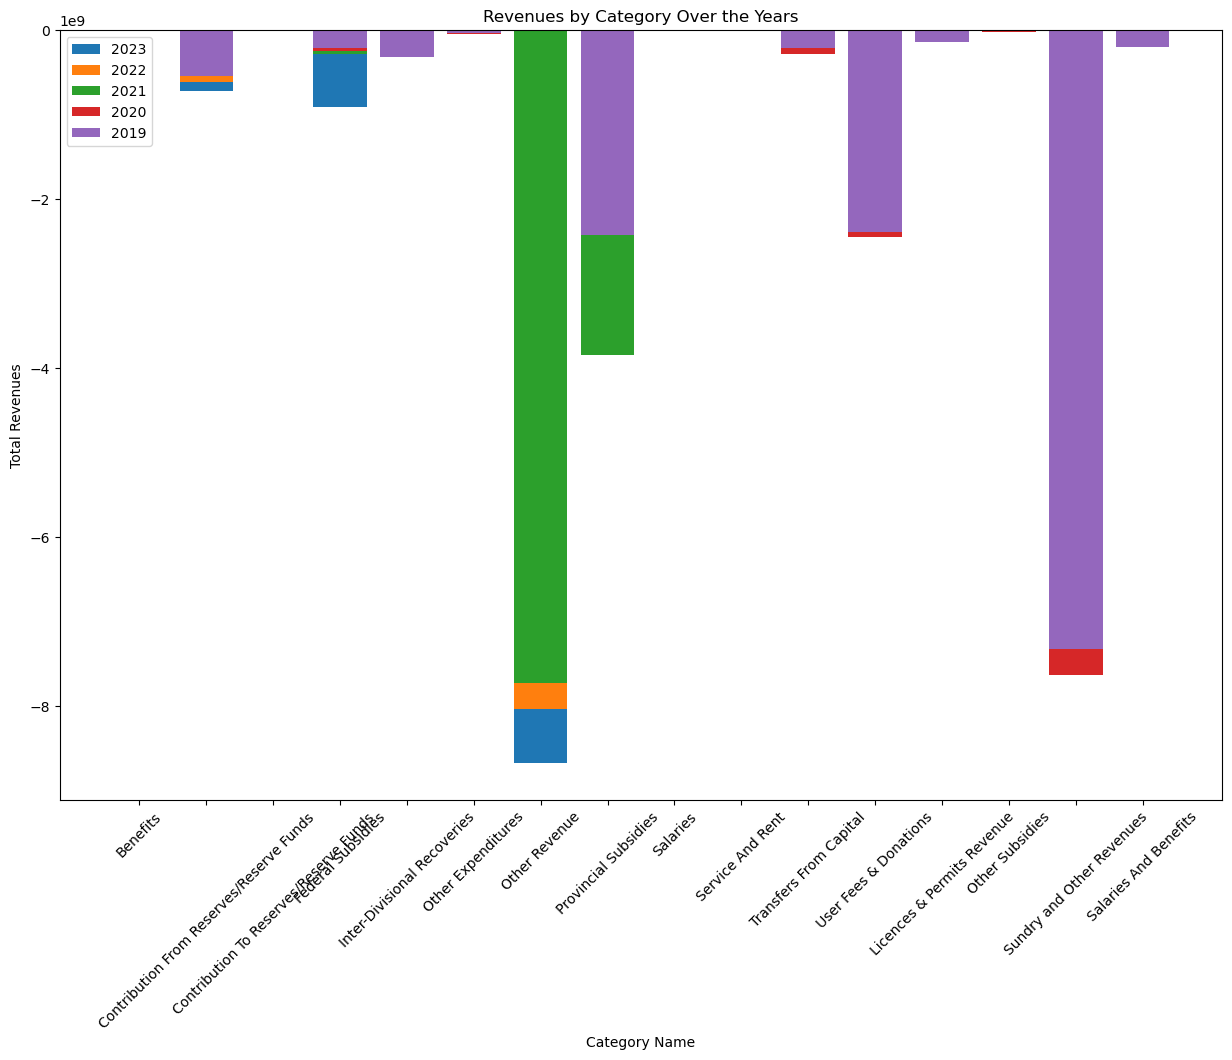

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_aggregate_data(file_path, year):
    df = pd.read_excel(file_path, sheet_name='Open Data')
    df_cleaned = df.drop_duplicates()

    # Convert all column names to strings
    df_cleaned.columns = df_cleaned.columns.map(str)

    # Find the correct column name for the financial data
    financial_column = str(year)
    for col in df_cleaned.columns:
        if str(year) in col:
            financial_column = col
            break

    # Create a column for the year using .loc
    df_cleaned = df_cleaned.copy()
    df_cleaned.loc[:, 'Year'] = year

    # Separating into expenses and revenues
    expenses_data = df_cleaned[df_cleaned[financial_column] > 0]
    revenues_data = df_cleaned[df_cleaned[financial_column] < 0]

    # Grouping by category and year, renaming the financial column to 'Amount'
    expenses_by_category = expenses_data.groupby(['Category Name', 'Year'])[financial_column].sum().reset_index().rename(columns={financial_column: 'Amount'})
    revenues_by_category = revenues_data.groupby(['Category Name', 'Year'])[financial_column].sum().reset_index().rename(columns={financial_column: 'Amount'})

    return expenses_by_category, revenues_by_category

# Paths to the files for each year

file_paths = {
    2023: 'Resources/approved-operating-budget-summary-2023.xlsx',
    2022: 'Resources/approved-operating-budget-summary-2022.xlsx',
    2021: 'Resources/approved-operating-budget-summary-2021.xlsx',
    2020: 'Resources/approved-operating-budget-summary-2020.xlsx',
    2019: 'Resources/approved-operating-budget-summary-2019.xlsx',
  
}

# Aggregating data from all years
all_expenses = pd.DataFrame()
all_revenues = pd.DataFrame()

for year, file_path in file_paths.items():
    expenses, revenues = load_and_aggregate_data(file_path, year)
    all_expenses = pd.concat([all_expenses, expenses])
    all_revenues = pd.concat([all_revenues, revenues])

# Plotting Expenses for all years
plt.figure(figsize=(15, 10))
for year in file_paths.keys():
    yearly_data = all_expenses[all_expenses['Year'] == year]
    plt.bar(yearly_data['Category Name'], yearly_data['Amount'], label=f'{year}')
plt.title('Expenses by Category Over the Years')
plt.xlabel('Category Name')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting Revenues for all years
plt.figure(figsize=(15, 10))
for year in file_paths.keys():
    yearly_data = all_revenues[all_revenues['Year'] == year]
    plt.bar(yearly_data['Category Name'], yearly_data['Amount'], label=f'{year}')
plt.title('Revenues by Category Over the Years')
plt.xlabel('Category Name')
plt.ylabel('Total Revenues')
plt.xticks(rotation=45)
plt.legend()
plt.show()



# Calculating mean, median and standard deviation for all 5 years(2019-2023) and givng outputs for each year, classified into revenues and expenses

In [2]:
import pandas as pd

def load_data(file_path, year):
    df = pd.read_excel(file_path, sheet_name='Open Data')
    df_cleaned = df.drop_duplicates()

    # Convert all column names to strings
    df_cleaned.columns = df_cleaned.columns.map(str)

    # Find the correct column name for the financial data
    financial_column = float(year)
    for col in df_cleaned.columns:
        if str(year) in col:
            financial_column = col
            break

    # Create a column for the year
    df_cleaned = df_cleaned.copy()
    df_cleaned.loc[:, 'Year'] = year
    df_cleaned.rename(columns={financial_column: 'Financial_Data'}, inplace=True)

    return df_cleaned

# Loading and aggregating data from all years
all_data = pd.DataFrame()

file_paths = {
    2023: 'Resources/approved-operating-budget-summary-2023.xlsx',
    2022: 'Resources/approved-operating-budget-summary-2022.xlsx',
    2021: 'Resources/approved-operating-budget-summary-2021.xlsx',
    2020: 'Resources/approved-operating-budget-summary-2020.xlsx',
    2019: 'Resources/approved-operating-budget-summary-2019.xlsx',
  
}

for year, file_path in file_paths.items():
    year_data = load_data(file_path, year)
    all_data = pd.concat([all_data, year_data])

# Separating into expenses and revenues
expenses_data = all_data[all_data['Financial_Data'] > 0]
revenues_data = all_data[all_data['Financial_Data'] < 0]

# Calculating statistics for expenses and revenues across all years
def calculate_statistics(df):
    mean = df.groupby('Year')['Financial_Data'].mean()
    median = df.groupby('Year')['Financial_Data'].median()
    std_dev = df.groupby('Year')['Financial_Data'].std()
    return mean, median, std_dev

expenses_mean, expenses_median, expenses_std_dev = calculate_statistics(expenses_data)
revenues_mean, revenues_median, revenues_std_dev = calculate_statistics(revenues_data)

# Printing the results
print("Expenses Statistics:")
print("Mean:\n", expenses_mean)
print("\nMedian:\n", expenses_median)
print("\nStandard Deviation:\n", expenses_std_dev)

print("\nRevenues Statistics:")
print("Mean:\n", revenues_mean)
print("\nMedian:\n", revenues_median)
print("\nStandard Deviation:\n", revenues_std_dev)


Expenses Statistics:
Mean:
 Year
2019    788998.065530
2020    833219.175397
2021    900072.788795
2022    844088.966687
2023    903825.095056
Name: Financial_Data, dtype: float64

Median:
 Year
2019    5107.68
2020    5474.10
2021    6041.94
2022    5828.04
2023    5500.00
Name: Financial_Data, dtype: float64

Standard Deviation:
 Year
2019    1.588049e+07
2020    1.724870e+07
2021    1.733745e+07
2022    1.547773e+07
2023    1.698025e+07
Name: Financial_Data, dtype: float64

Revenues Statistics:
Mean:
 Year
2019   -7.035736e+06
2020   -1.041492e+07
2021   -1.099464e+07
2022   -1.115546e+07
2023   -1.166024e+07
Name: Financial_Data, dtype: float64

Median:
 Year
2019   -116000.00
2020   -168991.00
2021   -174769.52
2022   -170000.00
2023   -190000.00
Name: Financial_Data, dtype: float64

Standard Deviation:
 Year
2019    1.086644e+08
2020    1.370595e+08
2021    1.432267e+08
2022    1.447655e+08
2023    1.493384e+08
Name: Financial_Data, dtype: float64


# Visualizing Standard Deviation as a box plot

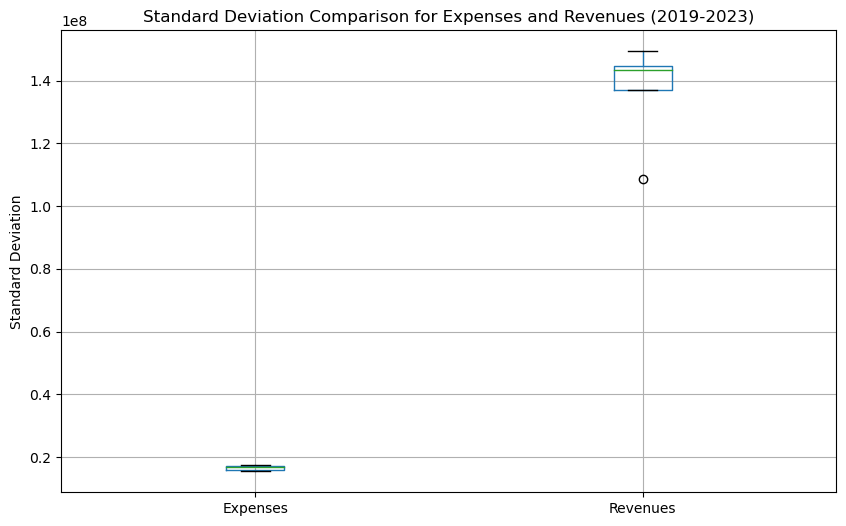

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Standard deviation data from your provided statistics
std_dev_data = {
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Expenses_Std_Dev": [1.588049e+07, 1.724870e+07, 1.733745e+07, 1.547773e+07, 1.698025e+07],
    "Revenues_Std_Dev": [1.086644e+08, 1.370595e+08, 1.432267e+08, 1.447655e+08, 1.493384e+08]
}

# Creating a DataFrame
std_dev_df = pd.DataFrame(std_dev_data)

# Setting the 'Year' column as the index
std_dev_df.set_index('Year', inplace=True)

# Plotting the box plot for standard deviations
plt.figure(figsize=(10, 6))
std_dev_df.boxplot(column=['Expenses_Std_Dev', 'Revenues_Std_Dev'])
plt.title('Standard Deviation Comparison for Expenses and Revenues (2019-2023)')
plt.ylabel('Standard Deviation')
plt.xticks([1, 2], ['Expenses', 'Revenues'])
plt.show()


# Visualizing Standard Deviation as a bell curve

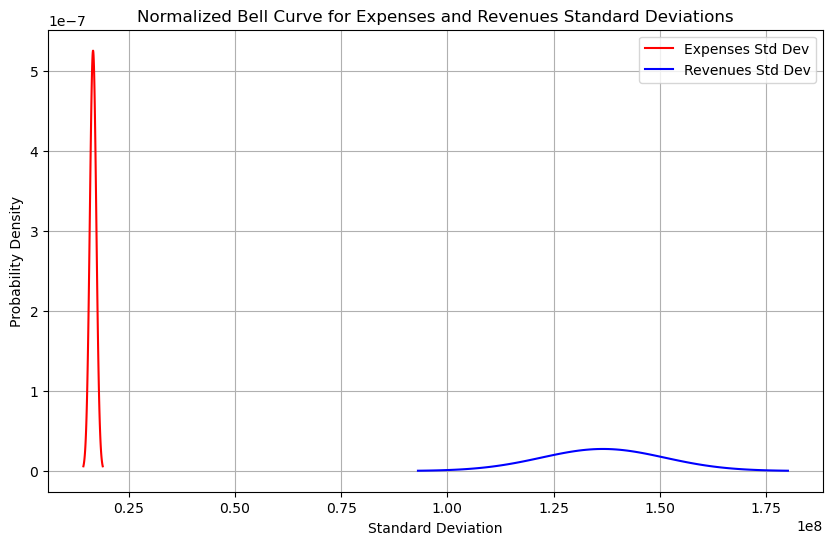

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example standard deviation data
expenses_std_dev = [1.588049e+07, 1.724870e+07, 1.733745e+07, 1.547773e+07, 1.698025e+07]
revenues_std_dev = [1.086644e+08, 1.370595e+08, 1.432267e+08, 1.447655e+08, 1.493384e+08]

# Calculate the mean and standard deviation
expenses_mean, expenses_std = np.mean(expenses_std_dev), np.std(expenses_std_dev)
revenues_mean, revenues_std = np.mean(revenues_std_dev), np.std(revenues_std_dev)

# Generate points on the x axis
x_expenses = np.linspace(expenses_mean - 3*expenses_std, expenses_mean + 3*expenses_std, 100)
x_revenues = np.linspace(revenues_mean - 3*revenues_std, revenues_mean + 3*revenues_std, 100)

# Calculate the PDF for these points
y_expenses = norm.pdf(x_expenses, expenses_mean, expenses_std)
y_revenues = norm.pdf(x_revenues, revenues_mean, revenues_std)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_expenses, y_expenses, label='Expenses Std Dev', color='red')
plt.plot(x_revenues, y_revenues, label='Revenues Std Dev', color='blue')
plt.title('Normalized Bell Curve for Expenses and Revenues Standard Deviations')
plt.xlabel('Standard Deviation')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


# Visualizing Expenses and Revenues differetiated by programsn on a histogram

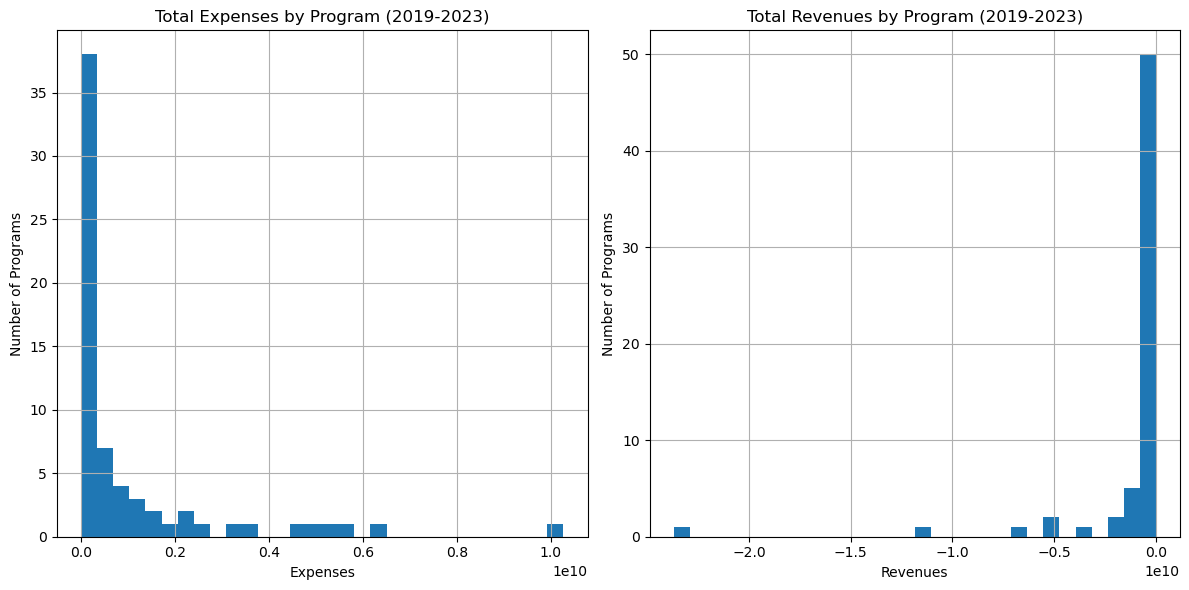

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Initializing lists to store DataFrames for each year
expenses_list = []
revenues_list = []

# Iterate over the files for each year
for year in range(2019, 2024):
    file_path = f'Resources/approved-operating-budget-summary-{year}.xlsx'
    budget_data = pd.read_excel(file_path, 'Open Data')

    # Separating expenses and revenues
    expenses_data = budget_data[budget_data['Expense/Revenue'] == 'Expenses']
    revenues_data = budget_data[budget_data['Expense/Revenue'] == 'Revenues']

    # Summing up expenses and revenues for each program
    expenses_by_program = expenses_data.groupby('Program')[float(year)].sum().reset_index()
    revenues_by_program = revenues_data.groupby('Program')[float(year)].sum().reset_index()

    # Rename the year column to a common name for concatenation
    expenses_by_program.rename(columns={float(year): 'Amount'}, inplace=True)
    revenues_by_program.rename(columns={float(year): 'Amount'}, inplace=True)

    # Append to the lists
    expenses_list.append(expenses_by_program)
    revenues_list.append(revenues_by_program)

# Concatenating and summing the expenses and revenues
total_expenses = pd.concat(expenses_list).groupby('Program')['Amount'].sum()
total_revenues = pd.concat(revenues_list).groupby('Program')['Amount'].sum()

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
total_expenses.hist(bins=30)
plt.title('Total Expenses by Program (2019-2023)')
plt.xlabel('Expenses')
plt.ylabel('Number of Programs')

plt.subplot(1, 2, 2)
total_revenues.hist(bins=30)
plt.title('Total Revenues by Program (2019-2023)')
plt.xlabel('Revenues')
plt.ylabel('Number of Programs')

plt.tight_layout()
plt.show()




# Highest/Lowest Program revenues and expenditure over 5 years

In [6]:
import pandas as pd

# Initialize lists to store results
lowest_expense_programs = []
highest_expense_programs = []

# Iterate over the files for each year
for year in range(2019, 2024):
    file_path = f'Resources/approved-operating-budget-summary-{year}.xlsx'
    budget_data = pd.read_excel(file_path, 'Open Data') 
    
    # Filtering only expenses
    expenses_data = budget_data[budget_data['Expense/Revenue'] == 'Expenses']

    # Grouping by Program and summing up the expenses
    total_expenses_by_program = expenses_data.groupby('Program')[year].sum().sort_values()

    # Identifying the programs with the highest and lowest expenses
    lowest_expense_program = total_expenses_by_program.idxmin()
    highest_expense_program = total_expenses_by_program.idxmax()
    lowest_expense_amount = total_expenses_by_program.min()
    highest_expense_amount = total_expenses_by_program.max()

    # Append results to the lists
    lowest_expense_programs.append((year, lowest_expense_program, lowest_expense_amount))
    highest_expense_programs.append((year, highest_expense_program, highest_expense_amount))

# Print results
for year, program, amount in lowest_expense_programs:
    print(f"{year} - Lowest Expense Program: {program} with an expense of {amount}")

for year, program, amount in highest_expense_programs:
    print(f"{year} - Highest Expense Program: {program} with an expense of {amount}")


2019 - Lowest Expense Program: Integrity Commissioner's Office with an expense of 575725.34
2020 - Lowest Expense Program: Integrity Commissioner's Office with an expense of 762406.78
2021 - Lowest Expense Program: Integrity Commissioner's Office with an expense of 741313.24
2022 - Lowest Expense Program: Integrity Commissioner's Office with an expense of 761587.2
2023 - Lowest Expense Program: Integrity Commissioner's Office with an expense of 759596.32
2019 - Highest Expense Program: Toronto Transit Commission - Conventional with an expense of 1910540399.22
2020 - Highest Expense Program: Toronto Transit Commission - Conventional with an expense of 1987170798.92
2021 - Highest Expense Program: Toronto Transit Commission - Conventional with an expense of 2034438000.0
2022 - Highest Expense Program: Toronto Transit Commission - Conventional with an expense of 2096541463.5900002
2023 - Highest Expense Program: Toronto Transit Commission - Conventional with an expense of 2237543963.48


# Lowest and Highest expense program across last 5 years (2029-2023)

In [7]:
import pandas as pd

# Initialize variables to store the lowest and highest expense program details
lowest_expense_program, lowest_expense_amount = None, float('inf')
highest_expense_program, highest_expense_amount = None, -float('inf')

# Iterate over the files for each year
for year in range(2019, 2024):
    file_path = f'Resources/approved-operating-budget-summary-{year}.xlsx'
    budget_data = pd.read_excel(file_path, 'Open Data')

    # Filtering only expenses
    expenses_data = budget_data[budget_data['Expense/Revenue'] == 'Expenses']

    # Grouping by Program and summing up the expenses
    total_expenses_by_program = expenses_data.groupby('Program')[float(year)].sum()

    # Update the accumulated expenses and check for lowest/highest
    for program, expense in total_expenses_by_program.items():
        # Updating lowest expense program
        if expense < lowest_expense_amount:
            lowest_expense_program, lowest_expense_amount = program, expense

        # Updating highest expense program
        if expense > highest_expense_amount:
            highest_expense_program, highest_expense_amount = program, expense

# Print results
print("Overall Lowest Expense Program:", lowest_expense_program, "with an expense of", lowest_expense_amount)
print("Overall Highest Expense Program:", highest_expense_program, "with an expense of", highest_expense_amount)


Overall Lowest Expense Program: Integrity Commissioner's Office with an expense of 575725.34
Overall Highest Expense Program: Toronto Transit Commission - Conventional with an expense of 2237543963.48


# Lowest and Highest revenue program across last 5 years (2029-2023)

In [8]:
import pandas as pd

# Initialize variables to store the lowest and highest revenue program details
lowest_revenue_program, lowest_revenue_amount = None, float('inf')
highest_revenue_program, highest_revenue_amount = None, -float('inf')

# Iterate over the files for each year
for year in range(2019, 2024):
    file_path = f'Resources/approved-operating-budget-summary-{year}.xlsx'
    budget_data = pd.read_excel(file_path, 'Open Data')

    # Filtering only revenues
    revenue_data = budget_data[budget_data['Expense/Revenue'] == 'Revenues']

    # Grouping by Program and summing up the revenues
    total_revenues_by_program = revenue_data.groupby('Program')[float(year)].sum()

    # Update the accumulated revenues and check for lowest/highest
    for program, revenue in total_revenues_by_program.items():
        # Update lowest revenue program
        if revenue < lowest_revenue_amount:
            lowest_revenue_program, lowest_revenue_amount = program, revenue

        # Update highest revenue program
        if revenue > highest_revenue_amount:
            highest_revenue_program, highest_revenue_amount = program, revenue

# Print results
print("Overall Lowest Revenue Program:", lowest_revenue_program, "with a revenue of", lowest_revenue_amount)
print("Overall Highest Revenue Program:", highest_revenue_program, "with a revenue of", highest_revenue_amount)


Overall Lowest Revenue Program: Non-Program Taxation Tax Levy with a revenue of -5200573571.27
Overall Highest Revenue Program: Auditor General's Office with a revenue of 0.0
